#### Part 1 - Introduction

Clear context, integrates domain knowledge, cites literature, highlights data significance. i.e. put "based on theory, factors affecting earth's surface temp are..."

#### Part 2 - Research Question

Innovative problem definition, clear objectives, critical thinking.

- plot temp over the years, see that if it's increasing
- if yes, then it's a problem -> reason why we choose temp as target var

#### Part 3 - Methodology

Scientifically justified methods, reproducible steps, technical depth.

##### 3A. Data Description

In [1]:
import pandas as pd

climate_data = pd.read_csv('project_1.csv')

# Display information
print(climate_data.head())
print(climate_data.info())

                  time  TREFMXAV_U       FLNS       FSNS         PRECT  \
0  2006-01-02 00:00:00   282.77585  41.925180  25.926952  4.663135e-09   
1  2006-01-03 00:00:00   284.47113   8.905806  10.946910  8.046593e-08   
2  2006-01-04 00:00:00   284.28796  16.511415   6.405902  2.910936e-09   
3  2006-01-05 00:00:00   282.12110  29.948362   9.315041  7.432505e-11   
4  2006-01-06 00:00:00   280.89090  19.064156   7.941241  6.894238e-12   

           PRSN      QBOT     TREFHT      UBOT      VBOT        lat    lon  
0  4.781004e-17  0.004769  279.14288  3.878579  1.394184  53.246075  357.5  
1  1.295726e-16  0.006271  281.14865  1.788157  3.821703  53.246075  357.5  
2  4.094447e-16  0.005782  281.22380  0.804845 -2.299140  53.246075  357.5  
3  0.000000e+00  0.004277  278.39767 -1.100267 -1.258029  53.246075  357.5  
4  0.000000e+00  0.003990  278.06378 -0.706321 -0.938421  53.246075  357.5  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27374 entries, 0 to 27373
Data columns (tot

In [2]:
# Missing values
missing_values = climate_data.isnull().sum()
print(f"Missing values:\n{missing_values}")

Missing values:
time          0
TREFMXAV_U    0
FLNS          0
FSNS          0
PRECT         0
PRSN          0
QBOT          0
TREFHT        0
UBOT          0
VBOT          0
lat           0
lon           0
dtype: int64


In [3]:
# Duplicates
duplicates = climate_data[climate_data.duplicated()]
print(f"Duplicate rows: {len(duplicates)}")

Duplicate rows: 0


In [4]:
# Summary statistics
num_columns = climate_data.select_dtypes(include=['number']).columns
print(f"Numerical Columns in store dataset: {num_columns}")
print(climate_data[num_columns].describe())

Numerical Columns in store dataset: Index(['TREFMXAV_U', 'FLNS', 'FSNS', 'PRECT', 'PRSN', 'QBOT', 'TREFHT', 'UBOT',
       'VBOT', 'lat', 'lon'],
      dtype='object')
         TREFMXAV_U          FLNS          FSNS         PRECT          PRSN  \
count  27374.000000  27374.000000  27374.000000  2.737400e+04  2.737400e+04   
mean     288.836179     42.995679     97.026261  3.379697e-08  3.049825e-10   
std        5.246468     21.451927     75.062880  4.986518e-08  4.706017e-09   
min      274.153200      0.611385      2.819259 -4.671764e-28 -6.256338e-21   
25%      284.719465     26.157544     31.037187  2.131118e-09  0.000000e+00   
50%      288.299895     40.777005     78.443183  1.311730e-08  1.206375e-21   
75%      292.869525     57.113572    149.332133  4.637272e-08  2.348279e-16   
max      311.257260    111.851400    310.191700  7.752961e-07  2.332090e-07   

               QBOT        TREFHT          UBOT          VBOT           lat  \
count  27374.000000  27374.000000  27374.

##### 3B. Data Preprocessing

In [5]:
# Change datatype to datetime
climate_data['time'] = pd.to_datetime(climate_data['time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [7]:
# Extract 'year' and 'month' from the 'time' column
climate_data['year'] = climate_data['time'].dt.year
climate_data['month'] = climate_data['time'].dt.month

In [8]:
# set "time" to index
climate_data.set_index('time', inplace=True)  

In [11]:
# PRECT cant be negative. Replace negative PRECT to 0

# Check how many entries where PRECT is <0
negative_entries = climate_data[(climate_data['PRECT'] < 0)]
print(f"Number of negative entries before fix: {len(negative_entries)}")

# Replace negative PRECT values with 0
climate_data.loc[(climate_data['PRECT'] < 0), 'PRECT'] = 0

# Verify the fix
negative_entries_after = climate_data[(climate_data['PRECT'] < 0)]
print(f"Number of negative entries after fix: {len(negative_entries_after)}")

Number of negative entries before fix: 0
Number of negative entries after fix: 0


In [12]:
# PRSN cant be negative. Replace negative PRSN to 0

# Check how many entries where PRSN is <0
negative_entries = climate_data[(climate_data['PRSN'] < 0)]
print(f"Number of negative entries before fix: {len(negative_entries)}")

# Replace negative PRSN values with 0
climate_data.loc[(climate_data['PRSN'] < 0), 'PRSN'] = 0

# Verify the fix
negative_entries_after = climate_data[(climate_data['PRSN'] < 0)]
print(f"Number of negative entries after fix: {len(negative_entries_after)}")

Number of negative entries before fix: 0
Number of negative entries after fix: 0


##### Q1: Is there a long-term trend indicating climate change in the region?

TREFHT

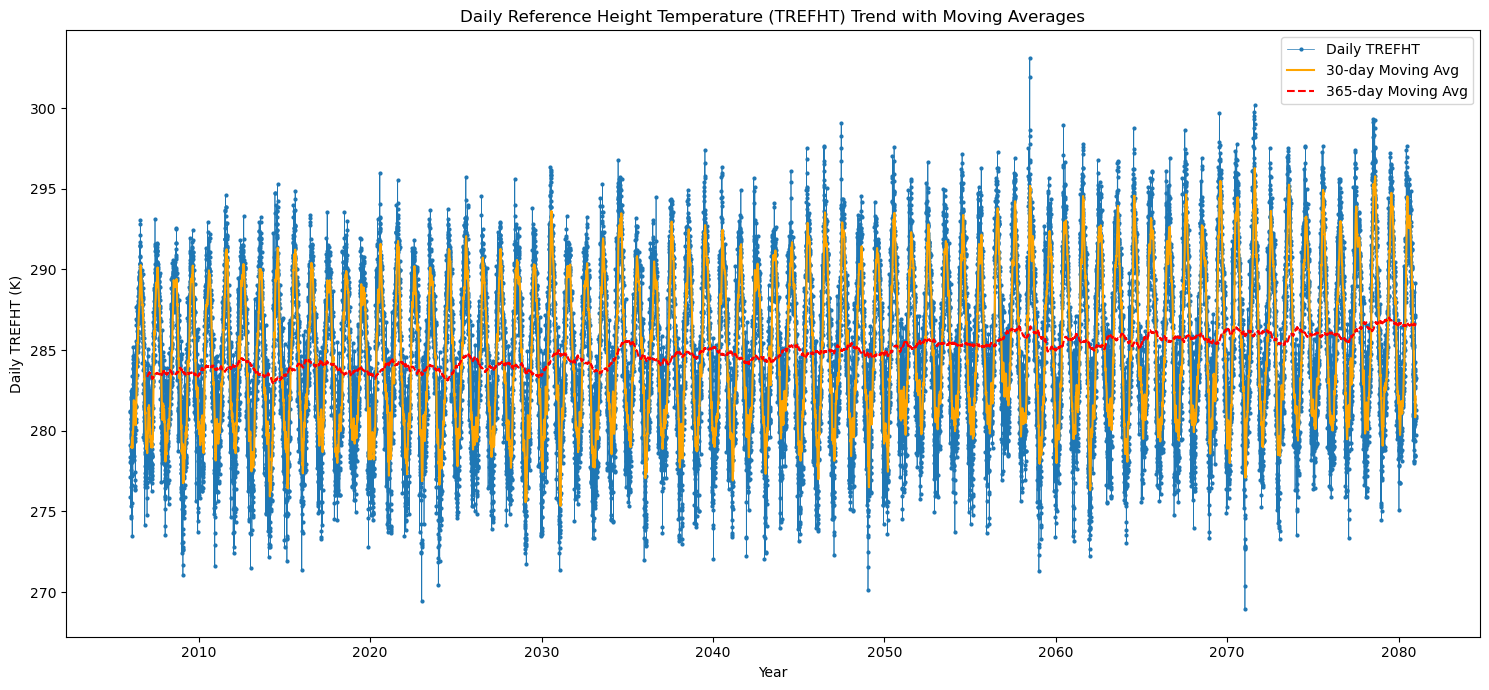

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Compute the long-term trend of daily TREFHT

plt.figure(figsize=(15, 7))
plt.plot(climate_data.index, climate_data['TREFHT'], marker='o', linestyle='-', linewidth=0.5, markersize=2, label="Daily TREFHT")

# Add moving averages (30-day and 365-day)
climate_data['TREFHT_30d'] = climate_data['TREFHT'].rolling(window=30).mean()
climate_data['TREFHT_365d'] = climate_data['TREFHT'].rolling(window=365).mean()
plt.plot(climate_data.index, climate_data['TREFHT_30d'], color='orange', label="30-day Moving Avg")
plt.plot(climate_data.index, climate_data['TREFHT_365d'], color='red', linestyle='--', label="365-day Moving Avg")

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Daily TREFHT (K)')
plt.title('Daily Reference Height Temperature (TREFHT) Trend with Moving Averages')
plt.legend()
plt.grid(False)
plt.tight_layout()

# Display the plot
plt.show()


##### The daily average temperature exhibits a seasonal cyclical pattern each year, with higher temperatures in summer and lower temperatures in winter, aligning with the typical seasonal climate variation.

The 365-day moving average curve shows a gradual upward trend overall, which may indicate a warming trend in future daily average temperatures.

Temperature fluctuates between 283K and 290K, but the overall values show a slight increase.

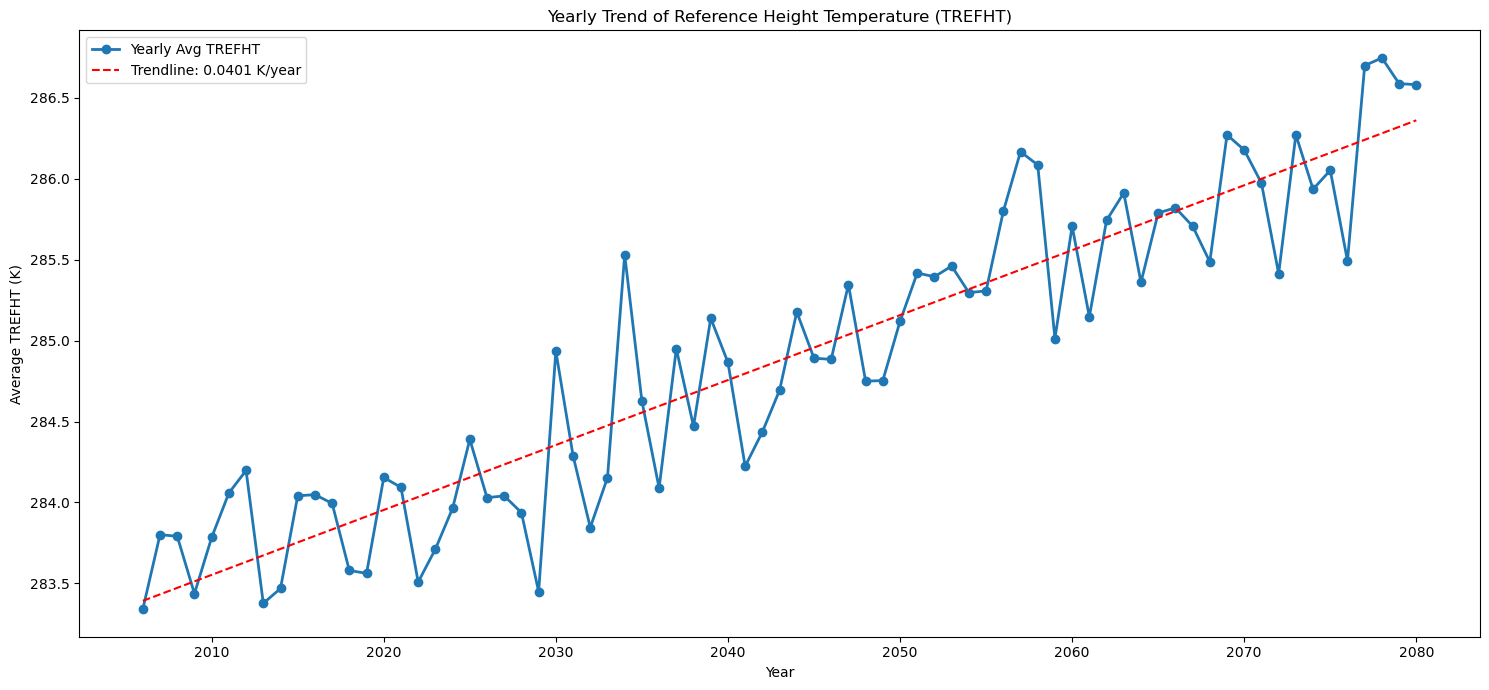

Estimated Temperature Change Rate for Daily TREFHT: 0.0401 K/year


In [15]:
from sklearn.linear_model import LinearRegression

# Compute the annual average TREFHT and perform linear regression analysis

# Calculate the annual average TREFHT
climate_data['year'] = climate_data.index.year
yearly_trend = climate_data.groupby('year')['TREFHT'].mean().reset_index()

# Perform linear regression
X = np.array(yearly_trend['year']).reshape(-1, 1)
y = yearly_trend['TREFHT']
model = LinearRegression()
model.fit(X, y)

# Compute the trendline
trendline = model.predict(X)

# Plot the annual temperature trend
plt.figure(figsize=(15, 7))
plt.plot(yearly_trend['year'], yearly_trend['TREFHT'], marker='o', linestyle='-', linewidth=2, markersize=6, label="Yearly Avg TREFHT")
plt.plot(yearly_trend['year'], trendline, linestyle='--', color='red', label=f'Trendline: {model.coef_[0]:.4f} K/year')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average TREFHT (K)')
plt.title('Yearly Trend of Reference Height Temperature (TREFHT)')
plt.legend()
plt.grid(False)
plt.tight_layout()

# Display the plot
plt.show()

# Output the temperature change rate
print(f"Estimated Temperature Change Rate for Daily TREFHT: {model.coef_[0]:.4f} K/year")


##### This plot shows a consistent upward trend in reference height temperature (TREFHT) from 2006 to 2080. The estimated temperature increase is 0.0401 K/year, leading to a total rise of approximately 2.96 K by 2080, indicating a clear global warming trend.

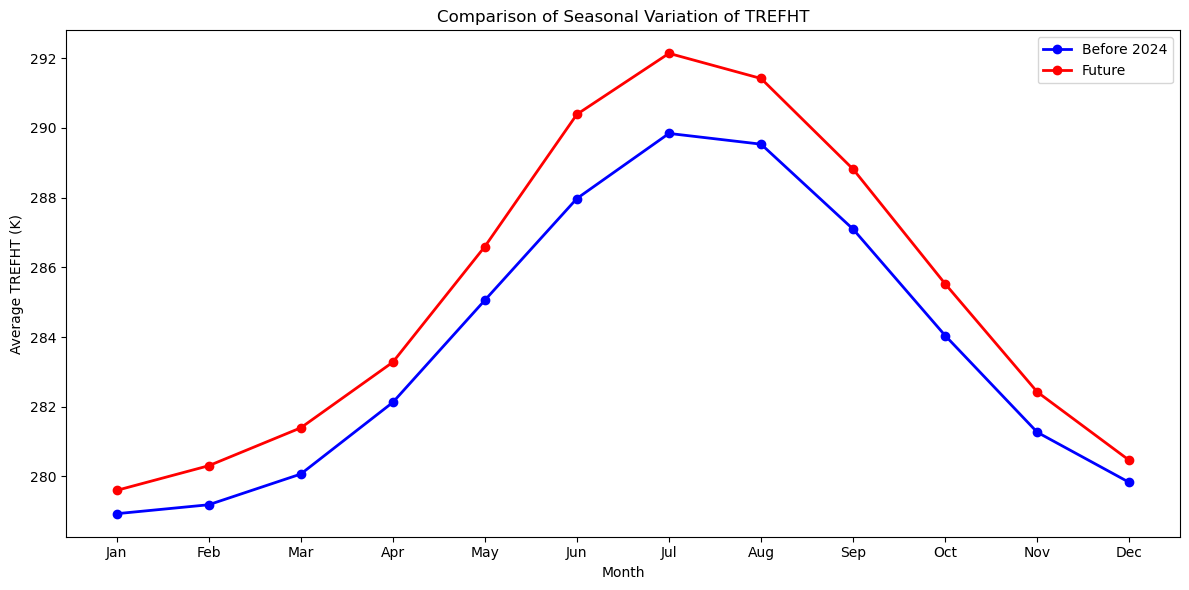

In [16]:
# Split the dataset
historical_data = climate_data[climate_data.index.year < 2024]  # Observed data before 2024
future_data = climate_data[climate_data.index.year >= 2024]  # Future projections from 2024 onwards

# Calculate the monthly average TREFHT
historical_monthly = historical_data.groupby(historical_data.index.month)['TREFHT'].mean()
future_monthly = future_data.groupby(future_data.index.month)['TREFHT'].mean()

# Plot the seasonal comparison
plt.figure(figsize=(12, 6))
plt.plot(historical_monthly.index, historical_monthly.values, marker='o', linestyle='-', linewidth=2, markersize=6, color='blue', label="Before 2024")
plt.plot(future_monthly.index, future_monthly.values, marker='o', linestyle='-', linewidth=2, markersize=6, color='red', label="Future")

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average TREFHT (K)')
plt.title('Comparison of Seasonal Variation of TREFHT')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(False)
plt.tight_layout()

# Display the plot
plt.show()


##### The seasonal pattern remains unchanged, with summer being the hottest and winter the coldest, indicating that the climate cycle is still primarily driven by the same natural factors (e.g., solar radiation).

Future temperatures are generally 1K - 2K higher compared to those before 2024, suggesting a clear warming trend that affects the entire year.

The greatest increase in daily average temperature occurs in summer, with future temperatures being approximately 1.5K - 2K higher than those before 2024.

The temperature increase in winter is relatively smaller, but still higher by approximately 0.8K - 1.2K.

### How was the Urban daily maximum of average 2-m temperature changed over time and how frequently do extrem temperature anomalies occur?

TREFMXAV_U (Urban daily maximum of average 2-m temperature)

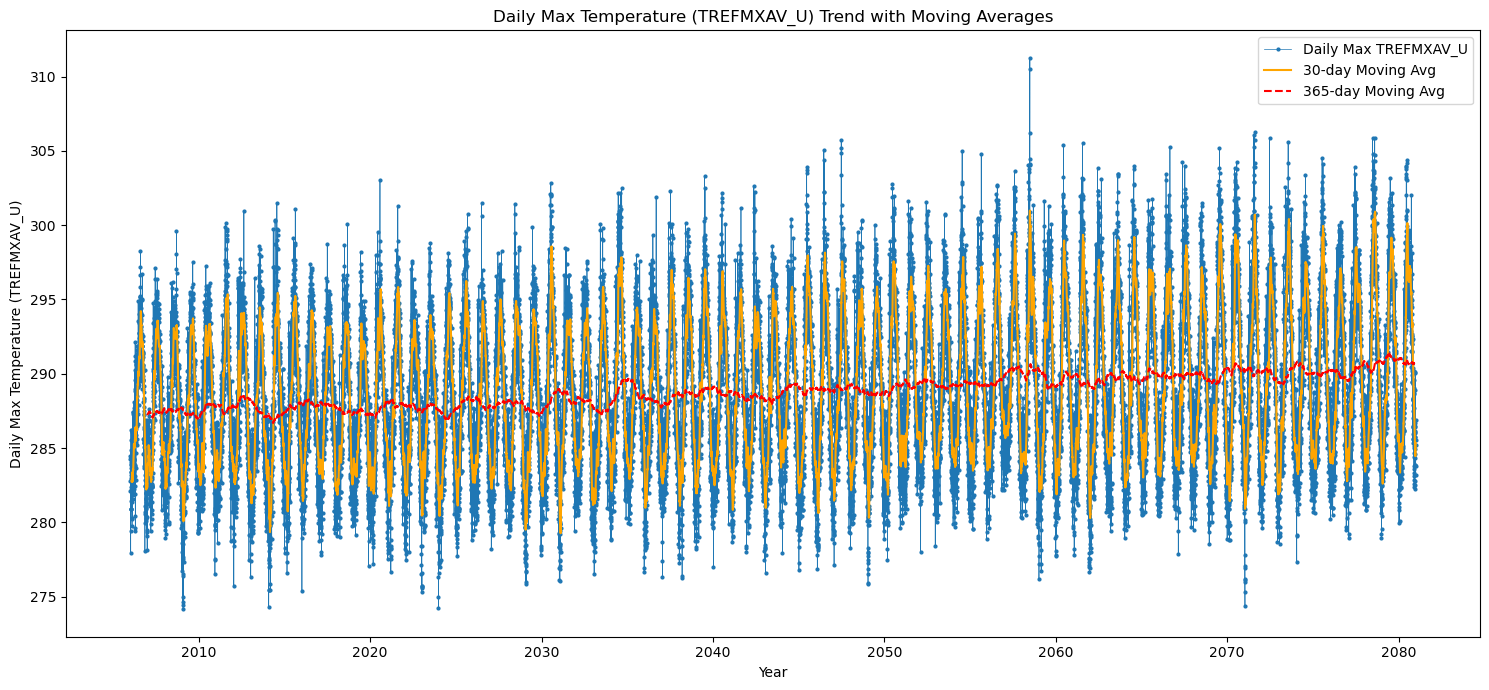

In [17]:
# 1. Compute the long-term trend of TREFMXAV_U

plt.figure(figsize=(15, 7))
plt.plot(climate_data.index, climate_data['TREFMXAV_U'], marker='o', linestyle='-', linewidth=0.5, markersize=2, label="Daily Max TREFMXAV_U")

# Add moving averages (30-day and 365-day)
climate_data['TREFMXAV_U_30d'] = climate_data['TREFMXAV_U'].rolling(window=30).mean()
climate_data['TREFMXAV_U_365d'] = climate_data['TREFMXAV_U'].rolling(window=365).mean()
plt.plot(climate_data.index, climate_data['TREFMXAV_U_30d'], color='orange', label="30-day Moving Avg")
plt.plot(climate_data.index, climate_data['TREFMXAV_U_365d'], color='red', linestyle='--', label="365-day Moving Avg")

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Daily Max Temperature (TREFMXAV_U)')
plt.title('Daily Max Temperature (TREFMXAV_U) Trend with Moving Averages')
plt.legend()
plt.grid(False)
plt.tight_layout()

# Display the plot
plt.show()



##### The daily maximum temperature is highest in summer and lowest in winter throughout the year.This is closely related to the solar radiation cycle, weather patterns, and surface energy balance.

The long-term trend indicates a gradual increase in daily maximum temperature:

Future high-temperature peaks may be higher than the present, suggesting a potential increase in extreme heat events (heatwaves).


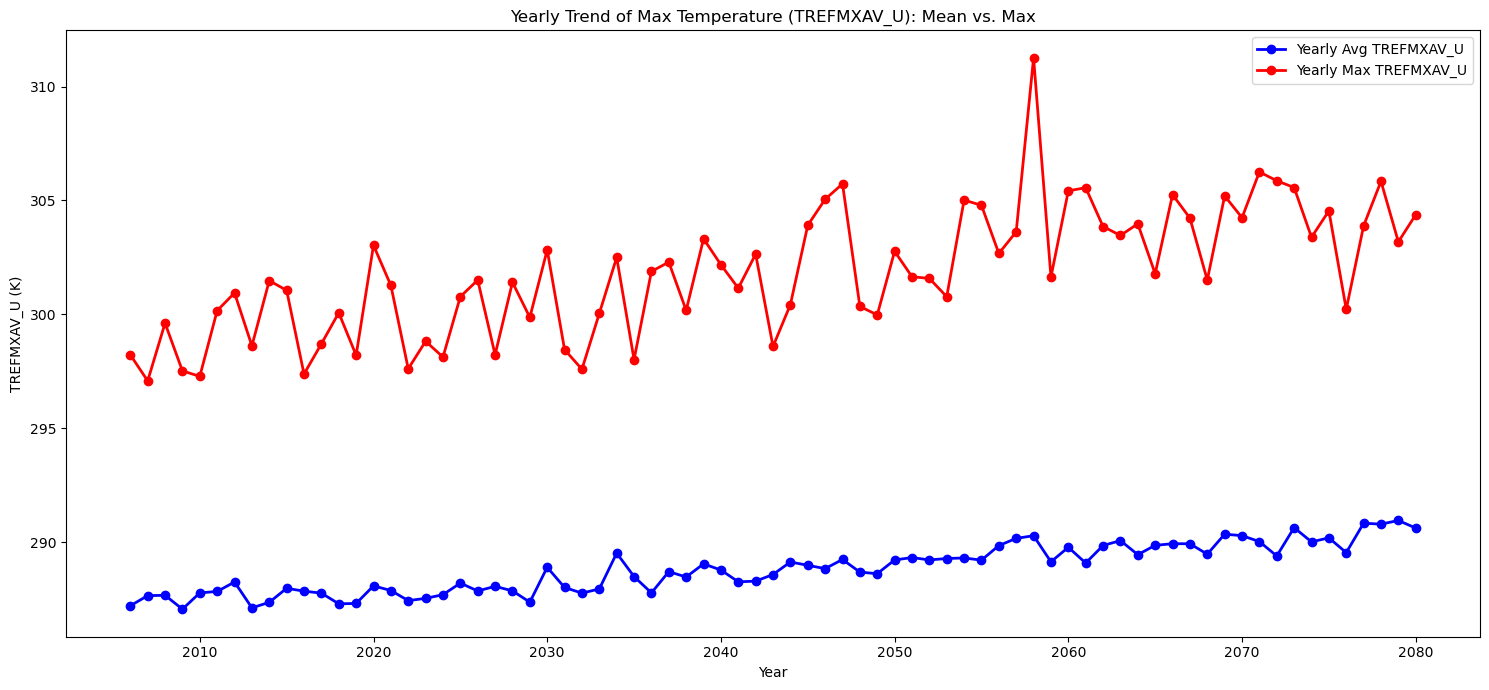

Estimated Temperature Change Rate (Yearly Mean): 0.0449 K/year
Estimated Temperature Change Rate (Yearly Max): 0.0914 K/year


In [19]:
# Compute the annual mean and maximum values of TREFMXAV_U
yearly_mean = climate_data.groupby(climate_data.index.year)['TREFMXAV_U'].mean()
yearly_max = climate_data.groupby(climate_data.index.year)['TREFMXAV_U'].max()

# Plot the trend graph
plt.figure(figsize=(15, 7))

# Plot the yearly average temperature trend
plt.plot(yearly_mean.index, yearly_mean.values, marker='o', linestyle='-', linewidth=2, markersize=6, label="Yearly Avg TREFMXAV_U", color='blue')

# Plot the yearly maximum temperature trend
plt.plot(yearly_max.index, yearly_max.values, marker='o', linestyle='-', linewidth=2, markersize=6, label="Yearly Max TREFMXAV_U", color='red')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('TREFMXAV_U (K)')
plt.title('Yearly Trend of Max Temperature (TREFMXAV_U): Mean vs. Max')
plt.legend()
plt.grid(False)
plt.tight_layout()

# Display the plot
plt.show()

# Compute trend lines for yearly mean and yearly max temperatures (linear regression)
X = np.array(yearly_mean.index).reshape(-1, 1)
y_mean = yearly_mean.values
y_max = yearly_max.values

model_mean = LinearRegression().fit(X, y_mean)
model_max = LinearRegression().fit(X, y_max)

# Output temperature change rate
print(f"Estimated Temperature Change Rate (Yearly Mean): {model_mean.coef_[0]:.4f} K/year")
print(f"Estimated Temperature Change Rate (Yearly Max): {model_max.coef_[0]:.4f} K/year")


##### The annual average daily maximum temperature shows a gradual upward trend, indicating that the overall climate is warming.

The calculated temperature change rate is 0.0449 K/year, demonstrating a steady increase in the annual average of daily maximum temperatures.

The yearly maximum temperature exhibits greater fluctuations, with some years experiencing significant peaks in extreme heat.

The calculated temperature change rate for yearly maximum temperature is 0.0914 K/year, which is significantly higher than the rate for the annual average daily maximum temperature.

This suggests that the increase in extreme high-temperature events is greater than the overall warming trend, meaning that extreme heat events are likely to become more frequent and more intense in the future.

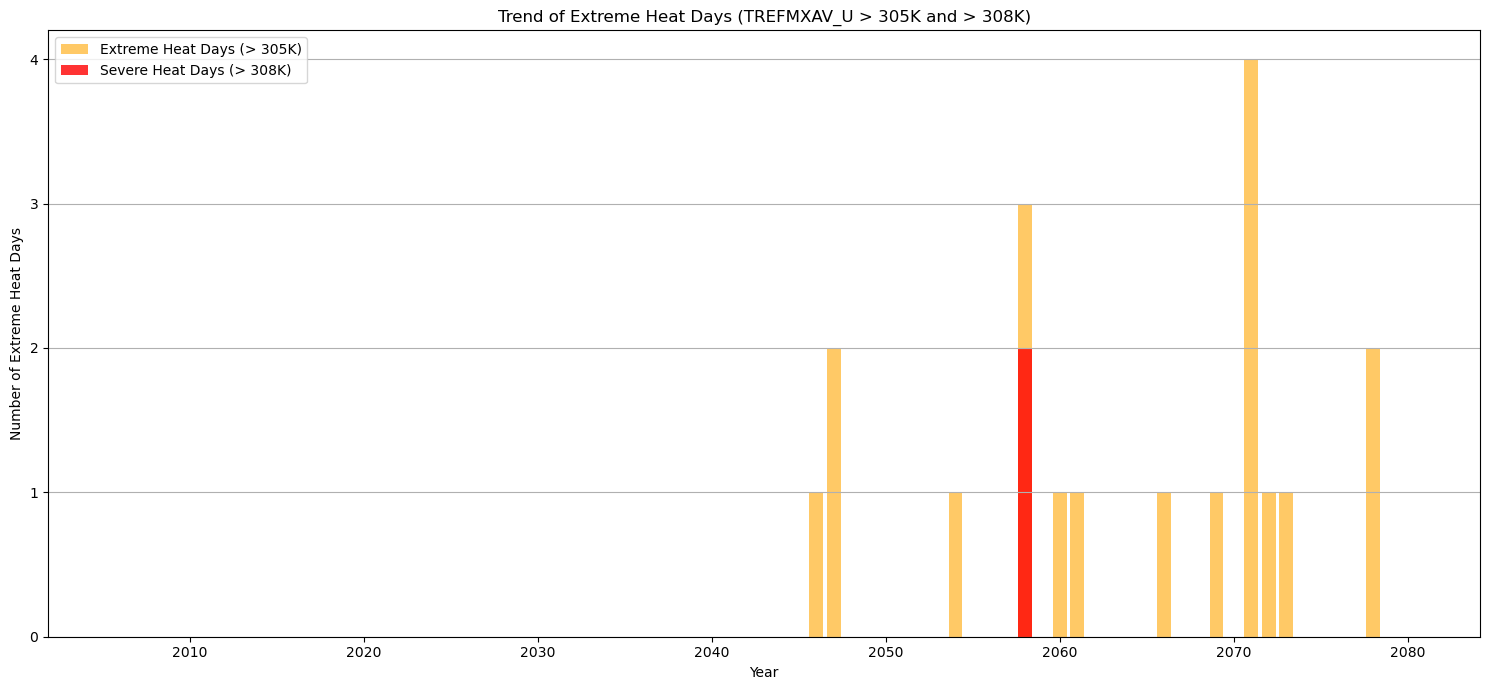

In [24]:
# Define new extreme heat thresholds
threshold_305K = 305  
threshold_308K = 308  

# Calculate the number of heatwave days
climate_data['heatwave_305K'] = climate_data['TREFMXAV_U'] > threshold_305K
climate_data['heatwave_308K'] = climate_data['TREFMXAV_U'] > threshold_308K

# Count the number of extreme heat days per year
heatwave_days_305K = climate_data.groupby(climate_data.index.year)['heatwave_305K'].sum()
heatwave_days_308K = climate_data.groupby(climate_data.index.year)['heatwave_308K'].sum()

# Plot the trend of extreme heat days
plt.figure(figsize=(15, 7))
plt.bar(heatwave_days_305K.index, heatwave_days_305K.values, color='orange', alpha=0.6, label='Extreme Heat Days (> 305K)')
plt.bar(heatwave_days_308K.index, heatwave_days_308K.values, color='red', alpha=0.8, label='Severe Heat Days (> 308K)')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Extreme Heat Days')
plt.title('Trend of Extreme Heat Days (TREFMXAV_U > 305K and > 308K)')
plt.yticks(range(0, int(max(heatwave_days_305K.max(), heatwave_days_308K.max())) + 1))
plt.legend()
plt.grid(axis='y')
plt.tight_layout()

# Display the plot
plt.show()


##### The number of high-temperature days exceeding 305K will increase significantly after 2050, indicating that high-temperature weather will become more frequent in the future.

Prolonged high-temperature events lasting several days may occur after 2060 and 2070.

Days with temperatures exceeding 308K appear only around 2060, with almost no extreme temperatures surpassing 308K in other years.

This suggests that while high-temperature weather may become more frequent in the future, extreme heatwaves (>308K) will remain relatively rare.

### What conditions are assoicated with extrem temperature anomalies

In [25]:
# Before standardisation (different scale between variables)
print(climate_data[num_columns].describe())

         TREFMXAV_U          FLNS          FSNS         PRECT          PRSN  \
count  27374.000000  27374.000000  27374.000000  2.737400e+04  2.737400e+04   
mean     288.836179     42.995679     97.026261  3.379697e-08  3.049825e-10   
std        5.246468     21.451927     75.062880  4.986518e-08  4.706017e-09   
min      274.153200      0.611385      2.819259  0.000000e+00  0.000000e+00   
25%      284.719465     26.157544     31.037187  2.131118e-09  0.000000e+00   
50%      288.299895     40.777005     78.443183  1.311730e-08  1.206375e-21   
75%      292.869525     57.113572    149.332133  4.637272e-08  2.348279e-16   
max      311.257260    111.851400    310.191700  7.752961e-07  2.332090e-07   

               QBOT        TREFHT          UBOT          VBOT           lat  \
count  27374.000000  27374.000000  27374.000000  27374.000000  2.737400e+04   
mean       0.006523    284.876413      1.176320      1.503084  5.324608e+01   
std        0.002126      4.992277      3.066843    

In [26]:
# Check how many entries where FLNS is <0
negative_entries = climate_data[(climate_data['FLNS'] < 0)]
print(f"Number of negative entries before fix: {len(negative_entries)}")

Number of negative entries before fix: 0


In [27]:
# Check how many entries where FSNS is <0
negative_entries = climate_data[(climate_data['FSNS'] < 0)]
print(f"Number of negative entries before fix: {len(negative_entries)}")

Number of negative entries before fix: 0


In [58]:
from sklearn.preprocessing import MinMaxScaler

# Define variables
min_max_cols = ['TREFMXAV_U', 'TREFHT', 'PRECT', 'PRSN', 'QBOT', 'FLNS', 'FSNS']

# Initialize Min-Max Scaler
min_max_scaler = MinMaxScaler()

# Copy the dataset 
normalized_data = climate_data.copy()

# Apply Min-Max normalization 
normalized_data[min_max_cols] = min_max_scaler.fit_transform(normalized_data[min_max_cols])

In [59]:
normalized_data

,TREFMXAV_U,FLNS,FSNS,PRECT,PRSN,QBOT,TREFHT,UBOT,VBOT,lat,lon,year,month,TREFHT_30d,TREFHT_365d,TREFMXAV_U_30d,TREFMXAV_U_365d,heatwave_305K,heatwave_308K
time,,,,,,,,,,,,,,,,,,,
2006-01-02,0.232391,0.371393,0.075178,0.006015,2.050094e-10,0.217948,0.298555,3.878579,1.394184,53.246075,357.5,2006,1,NaN,NaN,NaN,NaN,False,False
2006-01-03,0.278081,0.074563,0.026442,0.103787,5.556072e-10,0.330316,0.357238,1.788157,3.821703,53.246075,357.5,2006,1,NaN,NaN,NaN,NaN,False,False
2006-01-04,0.273144,0.142934,0.011669,0.003755,1.755699e-09,0.293747,0.359437,0.804845,-2.299140,53.246075,357.5,2006,1,NaN,NaN,NaN,NaN,False,False
2006-01-05,0.214745,0.263727,0.021133,0.000096,0.000000e+00,0.181172,0.276752,-1.100267,-1.258029,53.246075,357.5,2006,1,NaN,NaN,NaN,NaN,False,False
2006-01-06,0.181589,0.165882,0.016664,0.000009,0.000000e+00,0.159701,0.266983,-0.706321,-0.938421,53.246075,357.5,2006,1,NaN,NaN,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080-12-27,0.342439,0.490436,0.090199,0.061510,0.000000e+00,0.311556,0.360454,1.665078,-1.866844,53.246075,357.5,2080,12,281.923955,286.600041,285.108636,290.642023,False,False
2080-12-28,0.297992,0.297172,0.040215,0.013521,0.000000e+00,0.302178,0.316164,-0.422336,2.654144,53.246075,357.5,2080,12,281.932659,286.598237,285.204149,290.644980,False,False
2080-12-29,0.306271,0.178286,0.041532,0.002051,0.000000e+00,0.338549,0.418522,0.827862,3.980862,53.246075,357.5,2080,12,282.010286,286.595071,285.293207,290.640308,False,False


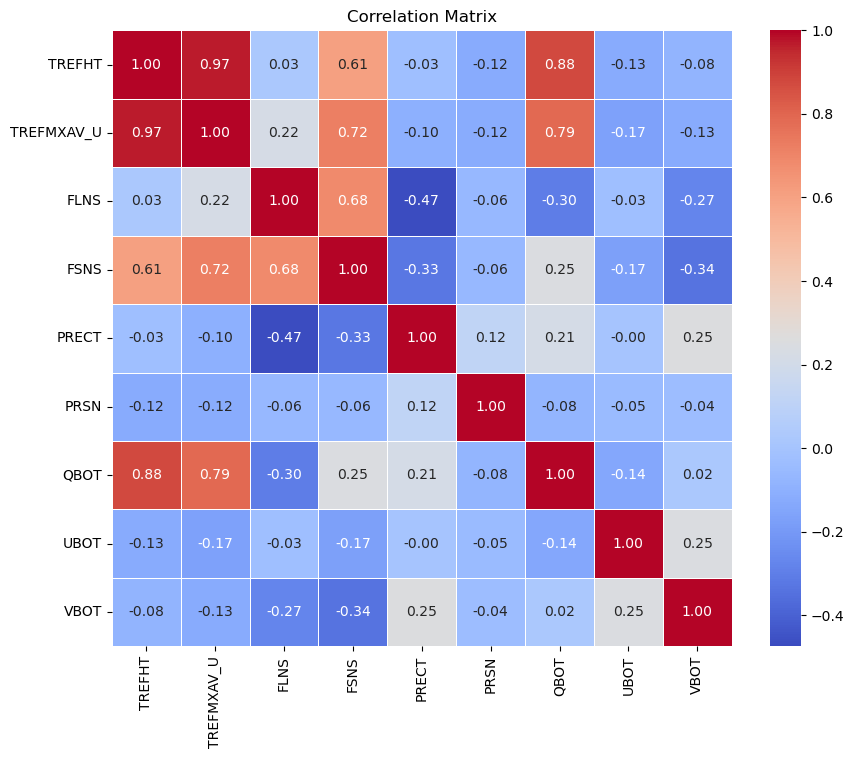

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select TREFHT and other related variables
correlation_vars = ['TREFHT', 'TREFMXAV_U', 'FLNS', 'FSNS', 'PRECT', 'PRSN', 'QBOT', 'UBOT', 'VBOT']

# Compute the correlation matrix
correlation_matrix = climate_data[correlation_vars].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

##### The correlation between TREFHT and TREFMXAV_U (0.97) is extremely high, indicating that the overall temperature trend is highly consistent with the trend of daily maximum temperature.

TREFMXAV_U has a strong positive correlation with FSNS (0.72), indicating that as FSNS increases (i.e., the surface absorbs more solar energy), TREFMXAV_U also rises. This suggests that solar radiation is a key driving factor for extreme heat events.

TREFMXAV_U also has a strong positive correlation with QBOT (0.79), implying that higher air humidity enhances the greenhouse effect, which may contribute to the persistence of extreme heat conditions.

Other variables show relatively weak correlations with the daily maximum temperature.

<Figure size 1200x800 with 0 Axes>

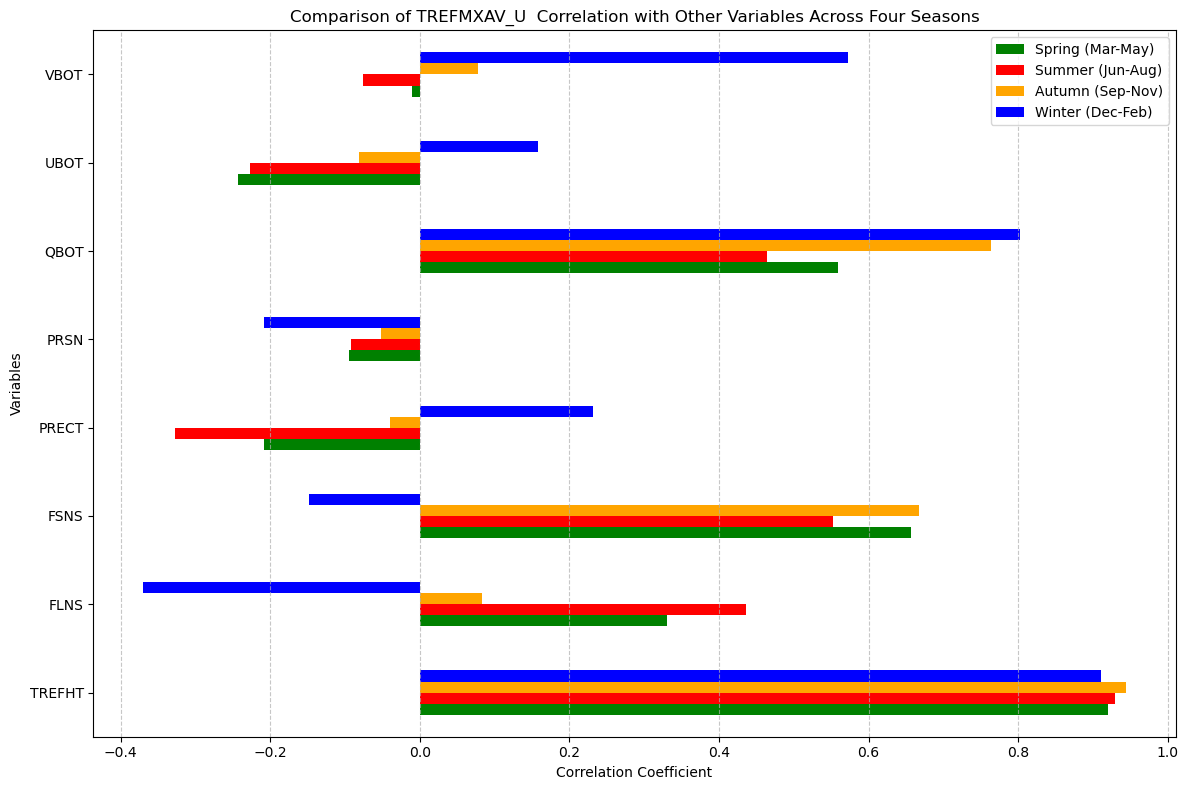

In [52]:
# Define four seasons
season_mapping = {
    'Spring': [3, 4, 5],   # Spring (March-May)
    'Summer': [6, 7, 8],   # Summer (June-August)
    'Autumn': [9, 10, 11], # Autumn (September-November)
    'Winter': [12, 1, 2]   # Winter (December-February)
}

# Create a DataFrame to store correlations for the four seasons
seasonal_correlation = pd.DataFrame()

# Calculate the correlation between TREFMXAV_U  and other variables for each season
for season, months in season_mapping.items():
    season_data = climate_data[climate_data.index.month.isin(months)]
    correlation = season_data[correlation_vars].corr()['TREFMXAV_U'].drop('TREFMXAV_U')
    seasonal_correlation[season] = correlation

# Plot a horizontal bar chart comparing TREFHT correlations across four seasons
plt.figure(figsize=(12, 8))
seasonal_correlation.plot(kind='barh', figsize=(12, 8), color=['green', 'red', 'orange', 'blue'])

# Add labels and title
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.title('Comparison of TREFMXAV_U  Correlation with Other Variables Across Four Seasons')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(['Spring (Mar-May)', 'Summer (Jun-Aug)', 'Autumn (Sep-Nov)', 'Winter (Dec-Feb)'])
plt.tight_layout()

# Display the plot
plt.show()


##### Comparison of TREFMXAV_U Correlation with Other Meteorological Variables Across Four Seasons (Spring, Summer, Autumn, Winter)
QBOT: The correlation remains high in all seasons (around 0.5-0.8), indicating that air humidity has a significant impact on daily maximunm temperature. The correlation is highest in winter, possibly because humidity variations play a more crucial role in regulating temperature during this season.

FLNS: Exhibits a strong negative correlation in winter, suggesting that the cooling effect of longwave radiation is more pronounced during this season.

FSNS: Shows a strong positive correlation in spring, summer, and autumn, but in winter (blue), there is a significant negative correlation. This indicates that in winter, an increase in solar radiation may not directly lead to a rise in temperature.

PRSN: Displays a clear negative correlation with temperature in winter, which aligns with the climatic characteristic that heavy snowfall is usually associated with lower temperatures.

VBOT: The impact is most significant in winter, indicating that stronger wind speeds in winter enhance cold air advection, exerting a greater influence on temperature.

In summer, daily maximum temperature is primarily controlled by QBOT, FLNS and FSNS, whereas in winter, daily maximum temperature is more influenced by QBOT (humidity), FLNS (longwave radiation), and VBOT (north-south wind speed).

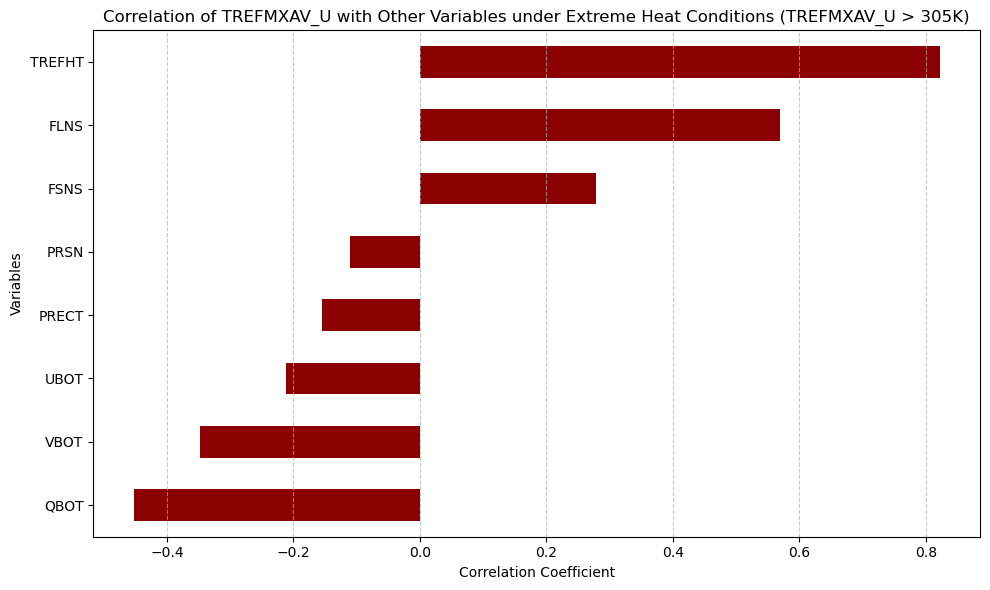

In [55]:
# Define extreme heat threshold (TREFMXAV_U > 305K)
extreme_temp_data = climate_data[climate_data['TREFMXAV_U'] > 305]

# Compute the correlation matrix under extreme heat conditions
selected_vars = ['TREFHT', 'TREFMXAV_U','FLNS', 'FSNS', 'PRECT', 'PRSN', 'QBOT', 'UBOT', 'VBOT']
extreme_correlation = extreme_temp_data[selected_vars].corr()['TREFMXAV_U'].drop('TREFMXAV_U')

# Plot correlation of TREFHT with other variables under extreme heat conditions
plt.figure(figsize=(10, 6))
extreme_correlation.sort_values().plot(kind='barh', color='darkred')

# Add labels and title
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.title('Correlation of TREFMXAV_U with Other Variables under Extreme Heat Conditions (TREFMXAV_U > 305K)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()


##### 
FLNS: Strong positive correlation, indicating that as longwave radiation increases, extreme heat temperatures also rise. This may be due to the enhanced greenhouse effect, which increases heat accumulation at the surface, thereby promoting the formation and persistence of extreme heat events.

FSNS: Also shows a strong positive correlation, suggesting that solar radiation is a key driving factor for extreme heat events. As solar radiation intensifies, the surface absorbs more heat, leading to a rise in temperature.

VBOT: Strong negative correlation, indicating that strong winds may reduce the likelihood of extreme heat. This could be because strong winds enhance air circulation, dissipating surface heat, and thereby mitigating extreme heat conditions.

QBOT: The strongest negative correlation (< -0.4), suggesting that higher humidity makes extreme heat events less likely. This may be because increased humidity enhances evaporative cooling, which helps lower temperatures.

<Figure size 1000x600 with 0 Axes>

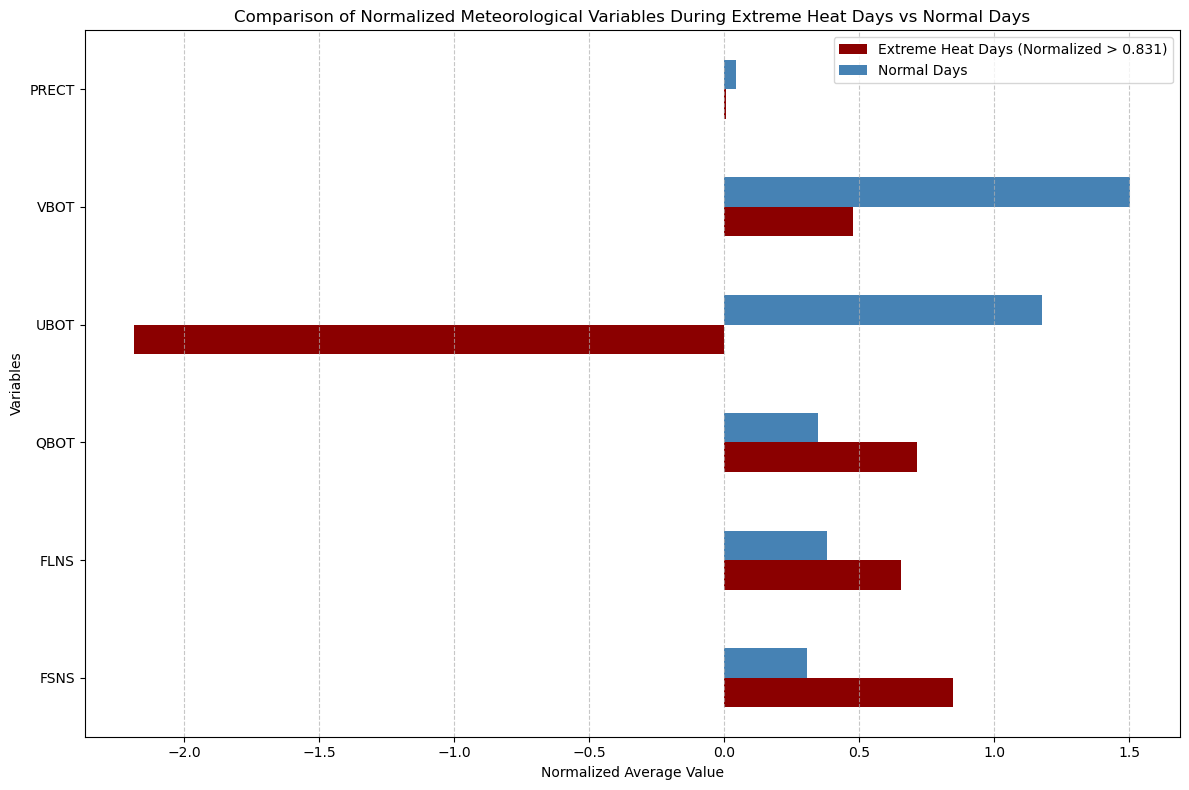

In [57]:
variables_of_interest = ['TREFMXAV_U', 'FSNS', 'FLNS', 'QBOT', 'UBOT', 'VBOT', 'PRECT']

# Determine the normalized threshold for 305K based on the original data range
original_305K = 305
min_val, max_val = climate_data['TREFMXAV_U'].min(), climate_data['TREFMXAV_U'].max()
normalized_305K = (original_305K - min_val) / (max_val - min_val)

# Select extreme heat days and normal temperature days using the normalized threshold
extreme_heat_data = normalized_data[normalized_data['TREFMXAV_U'] > normalized_305K]
normal_temp_data = normalized_data[normalized_data['TREFMXAV_U'] <= normalized_305K]

# Compute the average meteorological variables for extreme heat days and normal temperature days
extreme_means = extreme_heat_data[variables_of_interest[1:]].mean()
normal_means = normal_temp_data[variables_of_interest[1:]].mean()

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'Extreme Heat Days': extreme_means, 'Normal Days': normal_means})

# Plot a horizontal bar chart comparing meteorological variables on extreme heat days vs normal days
plt.figure(figsize=(10, 6))
comparison_df.plot(kind='barh', figsize=(12, 8), color=['darkred', 'steelblue'])

# Add labels and title
plt.xlabel('Normalized Average Value')
plt.ylabel('Variables')
plt.title('Comparison of Normalized Meteorological Variables During Extreme Heat Days vs Normal Days')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(['Extreme Heat Days (Normalized > {:.3f})'.format(normalized_305K), 'Normal Days'])
plt.tight_layout()

# Display the plot
plt.show()


##### Extreme heat days exhibit significantly higher FSNS (surface net shortwave radiation) and FLNS (surface downward longwave radiation) compared to normal days, indicating that enhanced solar and longwave radiation are key factors contributing to extreme heat events.

The QBOT (near-surface specific humidity) on extreme heat days is lower than on normal days, suggesting that extreme heat conditions are typically associated with lower air humidity.

Extreme heat days are dominated by easterly winds, while normal days are dominated by westerly winds.

The VBOT (near-surface meridional wind) on extreme heat days is significantly lower than on normal days but remains positive, indicating that southerly winds still dominate during extreme heat events, albeit at weaker speeds.
Southerly winds typically transport warm, moist air from lower latitudes or oceanic regions, but if the southerly winds weaken, it may lead to reduced humidity and precipitation, making extreme heat conditions drier and more persistent.

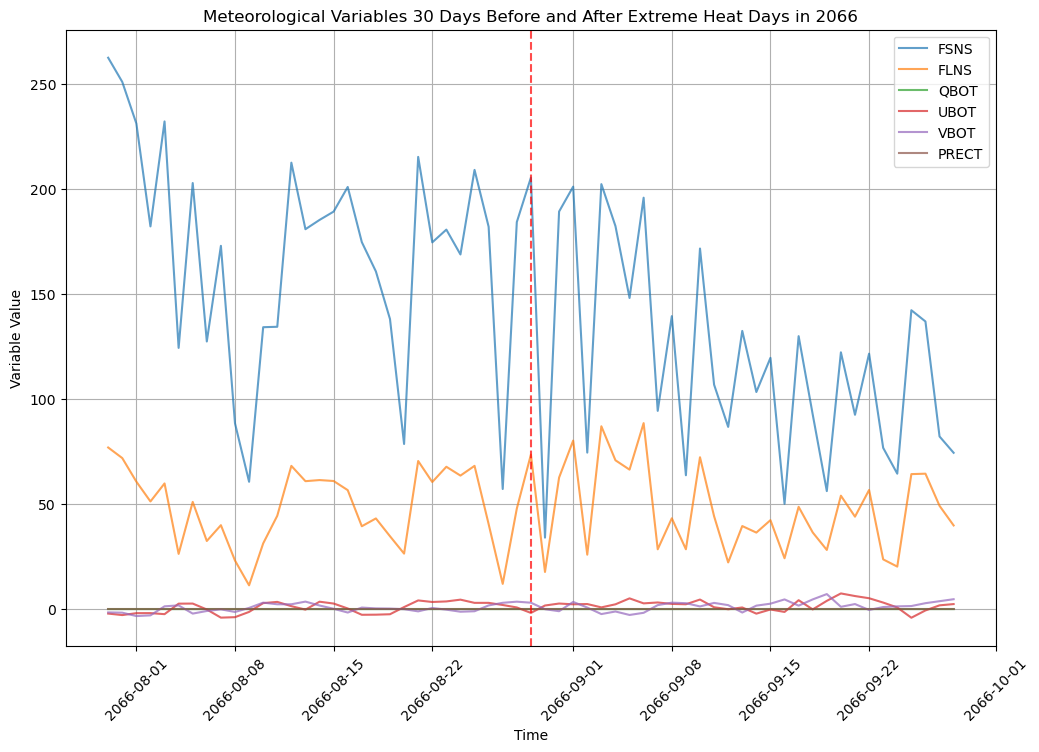

In [78]:
import matplotlib.pyplot as plt

# Select data for the year 2058
year_2058_data = climate_data[climate_data.index.year == 2066]

# Filter extreme heat days in 2058 (TREFMXAV_U > 305K)
extreme_days_2058 = year_2058_data[year_2058_data['TREFMXAV_U'] > 305].index

# If no extreme heat days are found, print a message
if extreme_days_2058.empty:
    print("No extreme heat days (TREFMXAV_U > 305K) found in 2066.")
else:
    # Select the first extreme heat day as the reference date
    base_date = extreme_days_2058[0]

    # Extract data for 30 days before and after the reference date
    start_date = base_date - pd.Timedelta(days=30)
    end_date = base_date + pd.Timedelta(days=30)
    analysis_data = year_2058_data.loc[start_date:end_date]

    # Select variables to plot
    variables_to_plot = ['FSNS', 'FLNS', 'QBOT', 'UBOT', 'VBOT', 'PRECT']

    # Plot time series of selected variables
    plt.figure(figsize=(12, 8))
    for var in variables_to_plot:
        plt.plot(analysis_data.index, analysis_data[var], label=var, alpha=0.7)

    # Add markers for all extreme heat days
    for extreme_date in extreme_days_2058:
        if start_date <= extreme_date <= end_date:  # Ensure markers are within the visible range
            plt.axvline(extreme_date, color='red', linestyle='--', alpha=0.7)

    # Add labels and title
    plt.xlabel('Time')
    plt.ylabel('Variable Value')
    plt.title(f'Meteorological Variables 30 Days Before and After Extreme Heat Days in 2066')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)

    # Display the plot
    plt.show()


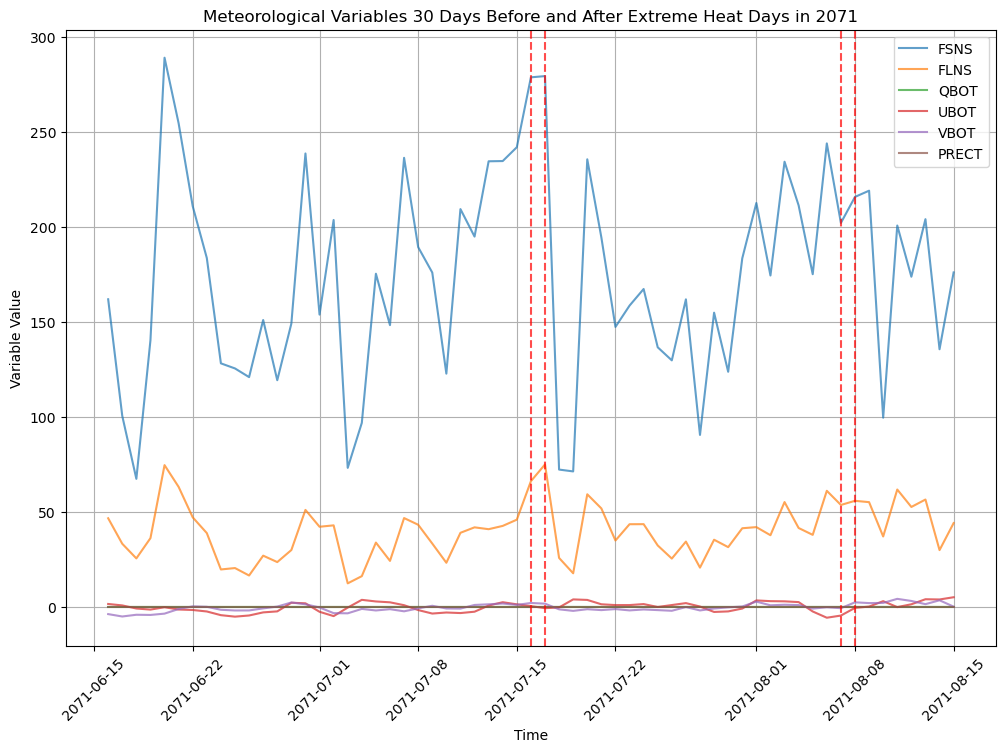

In [68]:
# Select data for the year 2071
year_2071_data = climate_data[climate_data.index.year == 2071]

# Filter extreme heat days in 2071 (TREFMXAV_U > 305K)
extreme_days_2071 = year_2071_data[year_2071_data['TREFMXAV_U'] > 305].index

# If no extreme heat days are found, print a message
if extreme_days_2071.empty:
    print("No extreme heat days (TREFMXAV_U > 305K) found in 2058.")
else:
    # Select the first extreme heat day as the reference date
    base_date = extreme_days_2071[0]

    # Extract data for 30 days before and after the reference date
    start_date = base_date - pd.Timedelta(days=30)
    end_date = base_date + pd.Timedelta(days=30)
    analysis_data = year_2071_data.loc[start_date:end_date]

    # Select variables to plot
    variables_to_plot = ['FSNS', 'FLNS', 'QBOT', 'UBOT', 'VBOT', 'PRECT']

    # Plot time series of selected variables
    plt.figure(figsize=(12, 8))
    for var in variables_to_plot:
        plt.plot(analysis_data.index, analysis_data[var], label=var, alpha=0.7)

    # Add markers for all extreme heat days
    for extreme_date in extreme_days_2071:
        if start_date <= extreme_date <= end_date:  # Ensure markers are within the visible range
            plt.axvline(extreme_date, color='red', linestyle='--', alpha=0.7)

    # Add labels and title
    plt.xlabel('Time')
    plt.ylabel('Variable Value')
    plt.title(f'Meteorological Variables 30 Days Before and After Extreme Heat Days in 2071')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)

    # Display the plot
    plt.show()

##### On extreme heat days, FSNS (solar radiation) and FLNS (longwave radiation) both reach high levels, indicating that enhanced solar radiation and the greenhouse effect are key driving factors for extreme heat events.